# Lab 6: Clustering 

In this lab, you will gain more experience with clustering. In particular, you will learn how to use two of the most popular clustering algorithms: Hierarchical Clustering and K-Means Clustering. Then, you will be asked to apply this knowledge on a document data set.

## Lab 6.A: Clustering Tutorial with Questions (50% of grade)

Let us start by importing the needed libraries. We will for the first time use sklearn library, which implements many of the most popular data science algorithms. We will be using this library often for the rest of this course. Please, take a moment to look at the sklearn documentation at: http://scikit-learn.org/stable/.

In [10]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from pandas import crosstab
from pandas.tools.plotting import scatter_matrix
import pandas as p
%matplotlib inline

Let us load the Iris data set and plot a scatter plot of the 2nd and 3rd attributes.

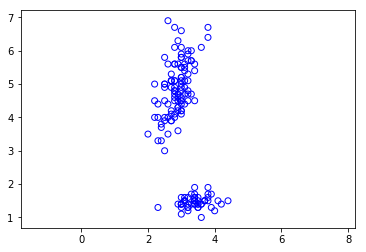

In [64]:
iris = datasets.load_iris()
d = iris.data
y = iris.target

plt.scatter(d[:,1],d[:,2],facecolors='none',color='blue')
plt.axis('equal');

## Hierarchical Clustering
Let us run the **hierarchical clustering** on the 2 columns of Iris. We will use only the first 20 rows. We'll call this new data set `dnew`.

In [283]:
A=range(0,20)
dnew = d[A,1:3]
# Build a dendrogram using single-linkage clustering and Euclidean distance
Z = hierarchy.linkage(dnew,method = 'single', metric = 'euclidean')
# Picks 2 clusters
cl = hierarchy.fcluster(Z, 2, criterion='maxclust')

Let us now plot the dendrogram. 

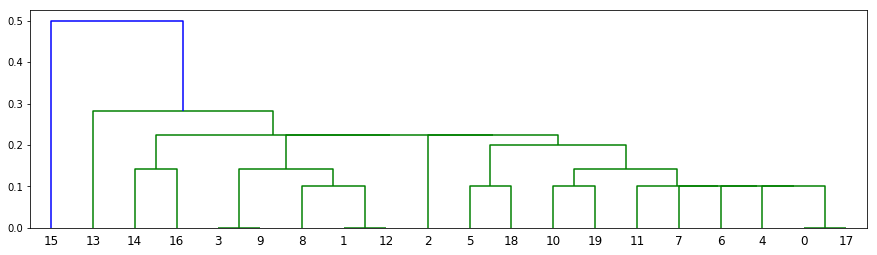

In [13]:
plt.figure(figsize = (15,4))
hierarchy.dendrogram(Z);

And, let us see the outcome of clustering

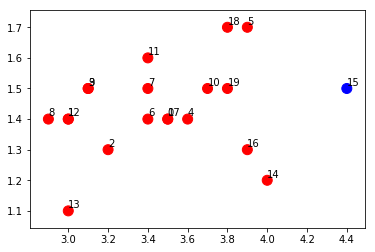

In [14]:
plt.figure()
colors=['red','blue']
plt.scatter(dnew[A,0],dnew[A,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
for i in A:
    plt.text(dnew[i,0],dnew[i,1]+0.01,s=str(i),size=10)

**Question 1**: Let us play with the clustering options
- Make 3 clusters. Discuss the result
- Use several different methods, other than 'single'. Try 'average' and one more of your choice. Discuss the result.
- Use a metric other than 'Eucliedean'. Discuss the result.

**Question 2**. Run the clustering on the whole Iris data set, using only 2nd and 3rd columns. Plot the results. Try to figure out which is the best number of clusters.

Each of the 150 flowers in Iris data set is labeled as one of 3 types of Irises. This information is in your variable `y`. Let us look at the cross-tabulation between the found clusters and the type of a flower:

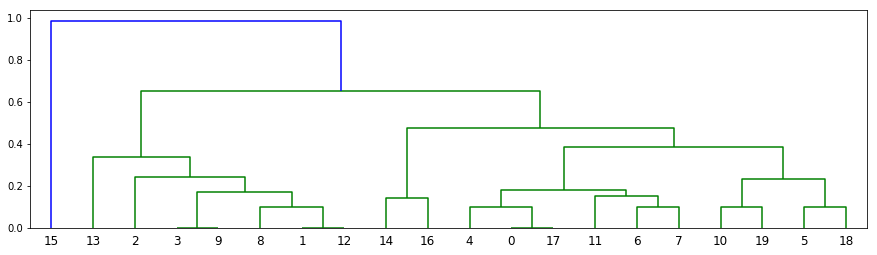

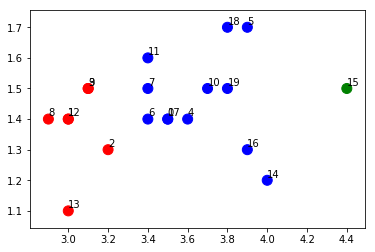

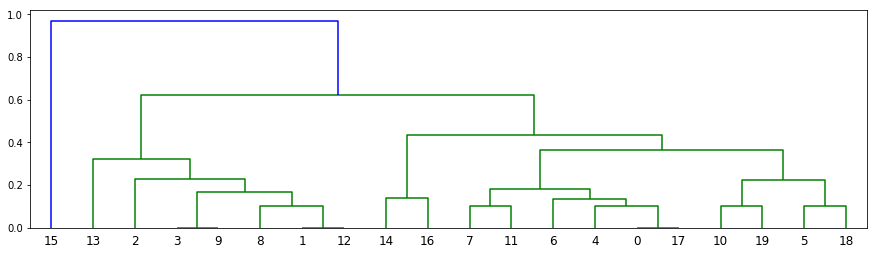

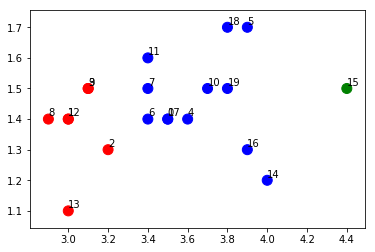

In [15]:
## Answer 1 code
A=range(0,20)
dnew = d[A,1:3]
# Dendrogram and cluster scatter plot using average method and Euclidean metric
Z = hierarchy.linkage(dnew,method = 'average', metric = 'euclidean')
# ... using weighted method
#Z = hierarchy.linkage(dnew,method = 'weighted', metric = 'euclidean')
cl = hierarchy.fcluster(Z, 3, criterion='maxclust')

plt.figure(figsize=(15,4))
hierarchy.dendrogram(Z)

plt.figure()
colors=['red','blue','green']
plt.scatter(dnew[A,0],dnew[A,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
for i in A:
    plt.text(dnew[i,0],dnew[i,1]+0.01,s=str(i),size=10)

# Dendrogram and cluster scatter plot using centroid method and Euclidean metric
Z = hierarchy.linkage(dnew,method = 'centroid', metric = 'euclidean')
# ... using median method
#Z = hierarchy.linkage(dnew,method = 'median', metric = 'euclidean')
cl = hierarchy.fcluster(Z, 3, criterion='maxclust')

plt.figure(figsize = (15,4))
hierarchy.dendrogram(Z);

plt.figure()
colors=['red','blue','green']
plt.scatter(dnew[A,0],dnew[A,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
for i in A:
    plt.text(dnew[i,0],dnew[i,1]+0.01,s=str(i),size=10)

[[3.5 1.4]
 [3.  1.4]
 [3.2 1.3]
 [3.1 1.5]
 [3.6 1.4]
 [3.9 1.7]
 [3.4 1.4]
 [3.4 1.5]
 [2.9 1.4]
 [3.1 1.5]
 [3.7 1.5]
 [3.4 1.6]
 [3.  1.4]
 [3.  1.1]
 [4.  1.2]
 [4.4 1.5]
 [3.9 1.3]
 [3.5 1.4]
 [3.8 1.7]
 [3.8 1.5]]


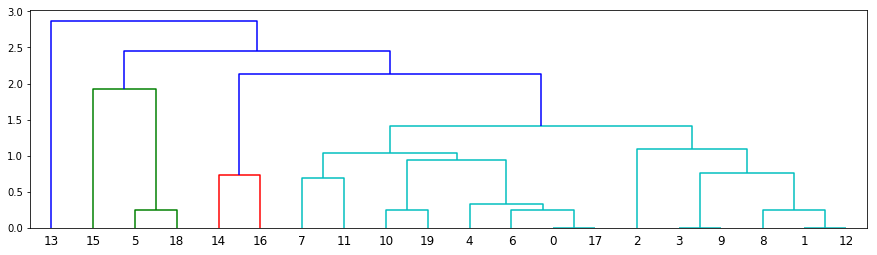

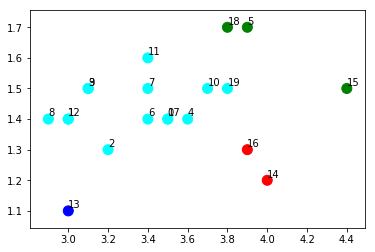

In [91]:
## Answer 1 code continued...
# Dendrogram and cluster scatter plot using average method and different metrics
A=range(0,20)
dnew = d[A,1:3]
#Z = hierarchy.linkage(dnew,method = 'average', metric = 'cityblock')
Z = hierarchy.linkage(dnew,method = 'average', metric = 'seuclidean')
cl = hierarchy.fcluster(Z, 4, criterion='maxclust')

plt.figure(figsize=(15,4))
hierarchy.dendrogram(Z)

plt.figure()
colors=['green','red','cyan','blue']
plt.scatter(dnew[A,0],dnew[A,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
for i in A:
    plt.text(dnew[i,0],dnew[i,1]+0.01,s=str(i),size=10)

**Answer 1**:
- After changing the cluster numbers to 3 and adding `green` to the end of the string list of colors, the 13th data point changes from red to blue while the 15th changes from blue to green.
- With `average` method, the linkage separates the three clusters more evenly based on constant updating of their average Euclidean distances from each other in a bottoms up approach and matching up clusters for data points that are closest to each other at every round of updating. Therefore we end up with now 5 dots red, 11 dots blue, and 1 green. (Note I know there are supposed to be 20 dots in total but 3 of the dots are overlapped by other data points as evidenced in the dendrogram for rows 3, 1, and 0.) After testing out several other methods, I found that `centroid` produces exactly the same resulting cluster scatter plot and an almost exactly similar dendrogram. The only difference in the dendrogram is the ordering of the rows [4, 0, 17, 11, 6, 7] which are paired different between average and centroid. Also comparing the difference between `weighted` and `average` methods, I found they are almost exactly similar as well shy for the different ordering of pairing into clusters of rows [11, 6, 7]. Most importantly all four methods produce the same cluster scatterplot which can be divided by two straight lines into three clearly separated clusters.
- I tested with average method and two different metrics: cityblock and seuclidean. `Cityblock` metric returned exactly the same clusters and ordering of clusters within its dendrogram and scatterplot. The only difference being the y-axis which is a measure of the distance between each child cluster. Cityblock metric had greater distances than the Euclidean because cityblock's formula involves summation of the abolsute value of differences between clusters while Euclidean is the square root after summation of the distances squared. `Seuclidean` represents the standardized euclidean distance which is similar to saying normalizing the distances by division of variance. With this metric, the dendrogram and scatterplot are changed drastically. Here, the clusters go from optimal solution of 3 clusters to 4 with data plot 13 being the outcast alone and 15 being assimilated into a cluster with data points 18 and 5.

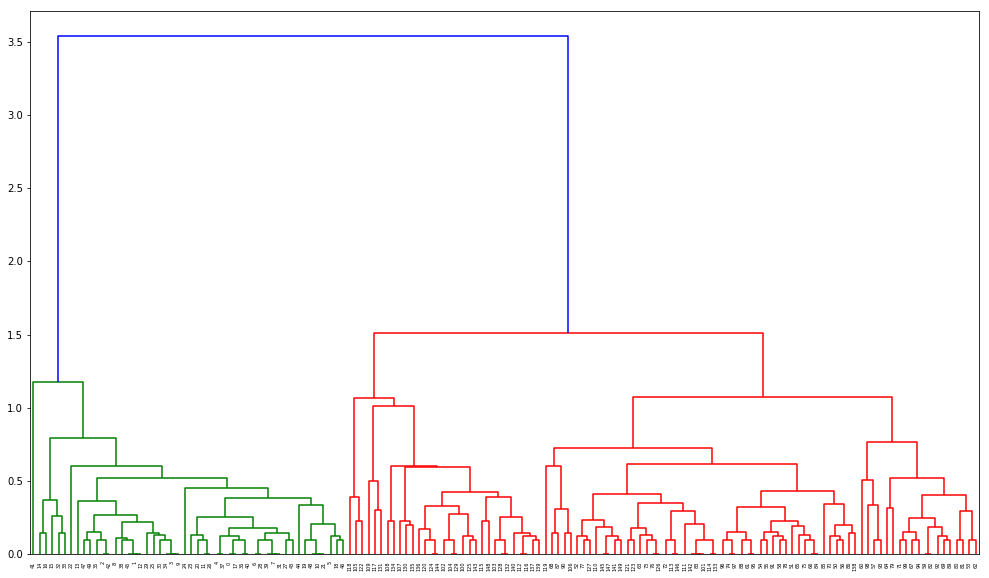

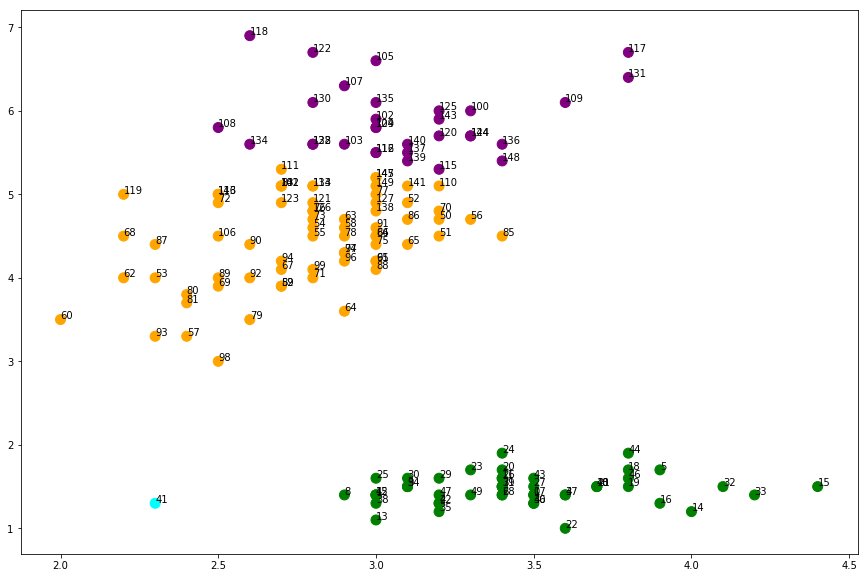

In [98]:
## Answer 2
A=range(0,150)   # A changed to incorporate all rows
dnew = d[A,1:3]   # dnew now contains all rows within the 2nd and 3rd colums
Z = hierarchy.linkage(dnew,method = 'average', metric = 'euclidean')
cl = hierarchy.fcluster(Z, 4, criterion='maxclust')

plt.figure(figsize=(17,10))
hierarchy.dendrogram(Z)

plt.figure(figsize=(15,10))
colors=['green','red','cyan','blue','purple','yellow','orange']
plt.scatter(dnew[A,0],dnew[A,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
for i in A:
    plt.text(dnew[i,0],dnew[i,1]+0.01,s=str(i),size=10)

#   I found the best number of clusters for average method and euclidean metric to be 4 clusters. The reasoning
# behind this is that I tried experimenting with the number of clusters and I found that anything above 4 would be
# unncessary. At 4 clusters, the plot points are already well grouped into sizeable counts and the one outlier data
# point 41 is properly set into its own group. I say "properly" because as we can see in the scatter plot that one
# specific dot is significantly far from other groups of plot points. The professor said in class once that sometimes
# it's necessary to have one more group just for outliers especially if they are by themselves far apart from others,
# which matches our current scenario. Also, as explained in previous labs, I want to be able to draw almost perfect
# straight lines that separate the clusters pretty well, which is achieved with 3 or 4 clusters. Anything above 4
# clusters seemed redundant because it simply splits the already well defined groups at the upper half of the y-axis
# even further. One can say 3 clusters is just as good, and it is. However, at 3 clusters the one outlier is grouped
# with the lower green data points, leading to that data point being "improperly" grouped with a cluster it really
# is not close to at all.
#   (NOTE: I also tested with the average method and cityblock metric, and found that 6 provided the optimal solution
# for this pair of clustering method and metric. The reasons being the outcast data point was separated into its own
# cluster and a cluster was made for data points [109, 117, 131]. This allowed straight lines to be similarly drawn
# to divide each cluster as with euclidean metric.)

In [76]:
dnew = d[:,1:3]
# Build a dendrogram using single-linkage clustering and Euclidean distance
Z = hierarchy.linkage(dnew,method = 'average', metric = 'euclidean')
# Picks 3 clusters
cl = hierarchy.fcluster(Z, 3, criterion='maxclust')
print(crosstab(cl, y, rownames=['cl'], colnames=['y']))

y    0   1   2
cl            
1   50   0   0
2    0   0  31
3    0  50  19


**Question 3**. Discuss the cross-tabulation result. Do you think clustering did a good job?

**Question 4**. Repeat the clustering, but this time find 3 clusters. Chack the cross-tabulate and discuss if you are happy with the result. Try with 4 and 5 clusters.

**Question 5**. Cross-tabulate results are useful for figuring out the quality of clustering. Your task is to propose a formula that uses the result of cross-tabulation to come up with a single number that measures the success of clustering. Please justify why you selected the formula.

**Question 6**. Repeat the clustering on the original Iris data, which has 4 attributes. Plot the scatter plot of the resulting clustering (remember, you can pick to see only 2 of the dimensions). Alternatively, do SVD to project your data to 2 dimensions and again plot the scatter plot. Take a look at the cross-tabulation. Try different clustering parameters and try to find the best clustering. Decide which choice of the parameters gives you the best results. Report on your findings with justifications for your conclusion.

**Answer 3**: <br>
Yes. I feel like the cross tabulation provided a good enough clustering of the data because, knowing there are 150 data points (flowers) and three different categories (types of flowers) in the data set, a "perfect" clustering is creating 3 clusters each with 50 data points. Since each row represents a cluster, there is one row with only 31 data points in it while another row has 69. This means that it's not a perfect clustering job but it does a fairly good job in grouping up the data set close to 50 data points in each cluster.

In [19]:
## Answer 4
dnew = d[:,1:3]
Z = hierarchy.linkage(dnew,method = 'average', metric = 'euclidean')
# Changing the cluster grouping to 4
cl = hierarchy.fcluster(Z, 4, criterion='maxclust')
print(crosstab(cl, y, rownames=['cl'], colnames=['y']))

cl = hierarchy.fcluster(Z, 5, criterion='maxclust')
# Cluster count changed to 5
print(crosstab(cl, y, rownames=['cl'], colnames=['y']))

# Since for question 3 the results of 3 clusters were already discussed, I'll just talk about results of 4 and 5.
#   At 4 clusters, I am less happy with the results than 3 clusters because with 4 clusters and 150 values in data set
# I expect each cluster to contain around 38 data points. However, only one row (cluster) is within the 30s range.
# Meanwhile 3 other rows are all outside of a 10 point deviation from the expected average data points for each
# cluster.
#   At 5 clusters, I am still not as happy as I was with 3 clusters, but I do feel better about it than 4 clusters.
# This is in part due to my expectations changing dependent on the total amount of clusters. With 5 clusters, I am
# expecting each cluster to contain around 30 data points. Even though the third row (cluster) is exactly the same
# in both cluster results, it is closer to the expected number of data points at total cluster count 5 than at 4.
# Comparing further with the fourth row which has now changed, it is still closer to the expected number of data
# points than the previous fourth row was at total cluster count 4. At 4 clusters, row 4 contains 69 data points and
# the difference with the expected was |37-68|=31 while at 5 clusters the difference was |30-50|=20.
# Clearly at 5 clusters there are more clusters which match the expected number of data points contained in each
# cluster closer than at 4 clusters so I believe on average, clustering into 5 is more favorable than 4 but both are
# still worse than at 3 clusters.

y    0   1   2
cl            
1   49   0   0
2    1   0   0
3    0   0  31
4    0  50  19
y    0   1   2
cl            
1   49   0   0
2    1   0   0
3    0   0  31
4    0  31  19
5    0  19   0


**Answer 5**:<br>
Before making this formula let me define some variables. Let n = total number of clusters, cl_i = number of values in the i-th cluster, t = total number of data values (rows) in the data set, andx̅ = expected mean = total number of values in data set/total number of clusters. The measure of success can be found by this formula:
$$1 - (∑ i=1~~to~~n~~of~~|cl_i - x̅|/t)$$
This formula is read as the summation from first cluster to the last of the absolute value of all differences between cl_i and the expected mean, divided by the total count of values in the data set, and lastly subtracting this value from 1. I decided to use this formula based on my intuition of finding out what is easier first. The summation part of the formula is very simply the error bound. I wanted to first count how much error there is and how much the results deviates from my expected average for each cluster based on the total number of values in the data set and the total number of clusters. Lastly, I subtract this error bound, aka percentage of incorrect values being grouped into "wrong" clusters, from 1. This final number is the percentage of success that the clustering did well in "correctly" clustering the data points evenly amongst the clusters. The closer this number is to 1 the better it is.
> (Note: I understand that this way of analyzing success ignores the possibility that the clusters weren't grouped into their inherently correct cluster. That is why I put quotation marks around the words wrong and correct. A data point could possibly be in a cluster that doesn't necessarily match it up with other data values that reflect similar properties/attributes. However this wasn't stated speficially in our prompt that we had to take into consideration, so I ignored it.)

shape: (150, 4)
Original Iris Data crosstab:
y      0   1   2
d_cl            
1     50   0   0
2      0   0  36
3      0   4   0
4      0  46  14

SVD of Iris Data
singular values: [95.95991387 17.76103366  3.46093093  1.88482631]
shape: (150, 4)
SVD Iris Data crosstab:
y        0   1   2
SVD_cl            
1        0   8  49
2        0  42   1
3       50   0   0


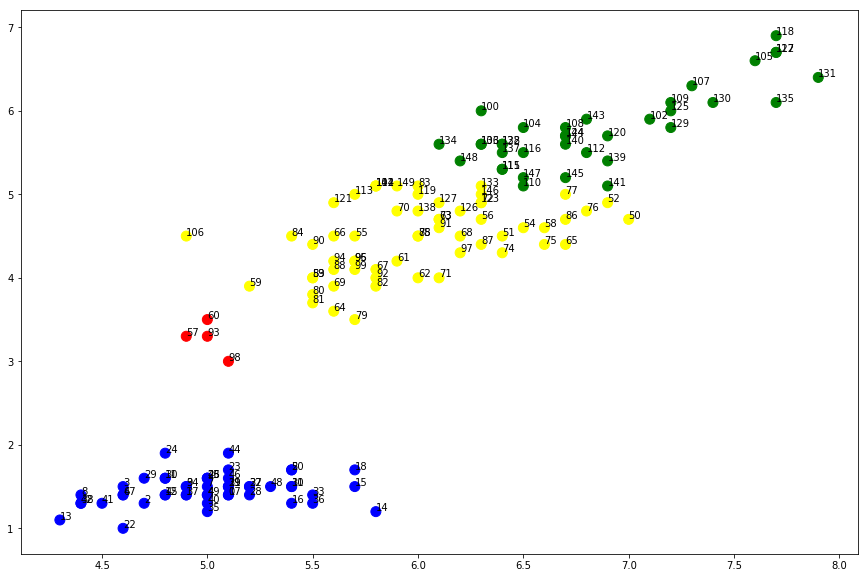

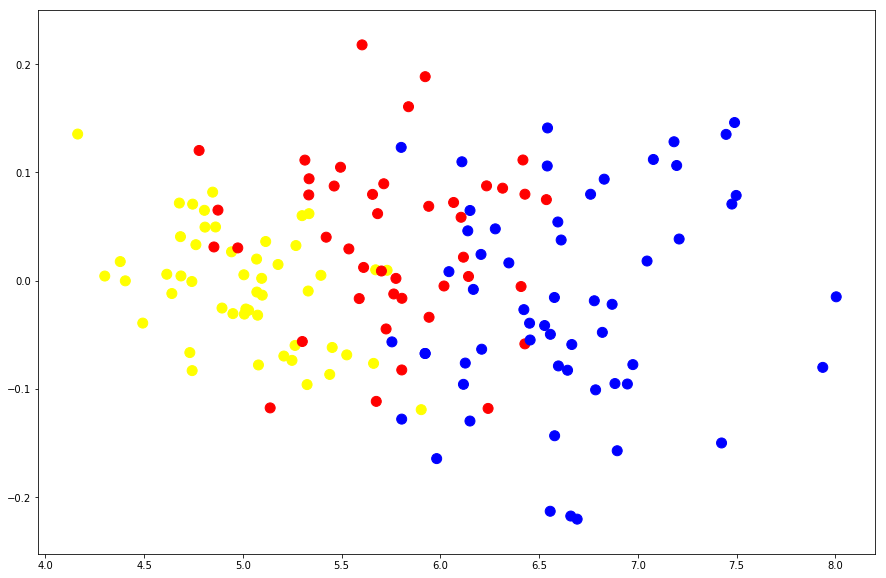

In [20]:
## Answer 6
# Scatter plot of the original Iris data using the first and third attribute
A = range(0,150)
d_link = hierarchy.linkage(d, method='average', metric='euclidean')
d_cl = hierarchy.fcluster(d_link, 4, criterion='maxclust')
print('shape:', np.shape(d))
colors = ['blue','green','red','yellow']
plt.figure(figsize=(15,10))
plt.scatter(d[:,0],d[:,2],c=d_cl,cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
for i in A:
    plt.text(d[i,0],d[i,2]+0.01,s=str(i),size=10)
print('Original Iris Data crosstab:')
print(crosstab(d_cl, y, rownames=['d_cl'], colnames=['y']))

#   I don't know why I chose 4 as the cluster number. I forgot for a moment that the original Iris data is still
# containing only the 3 types of flowers. I randomly thought 4 would cluster them by attributes... However it worked
# out in the end because the slight difference between clustering the scatterplots was evident at 4 clusters.

# Scatter plot of the SVD of the Iris data
U, s, V = np.linalg.svd(d)
print('\nSVD of Iris Data')
print('singular values:', s)
k=2
Ak = np.dot(U[:,0:k],np.dot(np.diag(s)[0:k,0:k], V[0:k,:]))
print('shape:', np.shape(Ak))
SVD_link = hierarchy.linkage(Ak, method='weighted', metric='cityblock')
SVD_cl = hierarchy.fcluster(SVD_link, 3, criterion='maxclust')
plt.figure(figsize=(15,10))
plt.scatter(Ak[:,0],U[:,2],c=SVD_cl,cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
print('SVD Iris Data crosstab:')
print(crosstab(SVD_cl, y, rownames=['SVD_cl'], colnames=['y']))

#   Since I did not really feel like thinking through the math of this, I kept using trial and error to find which
# parameters would produce the best results. I experimented with three different variables: 1) number of clusters,
# 2) method, and 3) metric. I changed them one at a time. First I found that 3 clusters is best to group these two
# attributes within the unitary matrix similar to clustering the original matrix. Then I narrowed down the methods
# and metrics that provided the best success rate according to my formula from the previous question.  These were
# methods: complete, weighted
# and metrics: euclidean, minkowski, cityblock, seuclidean
# The combo that resulted in the highest success rate was *(weighted,cityblock)*. Its success rate was around 91%.
# Coming in second and third were combos (weighted,euclidean) at 86.7%, and (complete,seuclidean) at 85% respectively.
# I did find that the combo (average,cosine) gave the highest rate at 96% but too many of the data points that were
# clustered together had deviated too far from other similarly colored points. Therefore these flowers did not seem
# properly clustered. I'll admit (weighted/cityblock) combo also produced quite a few dots that were colored
# differently than surrounding plot points. But, there were not as many as average cosine where one of the yellow
# points was all the way to the right side when it should have been closer to the center of the scatterplot.

## K-Means Clustering

K-means clustering is another clustering algorithm (we will cover it in class tomorrow). It still receives a data set as an input, as well as the desired number of clusters, and outputs the assignment of data points to clusters.

Let us illustrate how to use k-means on the iris data.

y    0   1   2
cl            
0    0   4  28
1   50   0   0
2    0   0  19
3    0  16   0
4    0  30   3


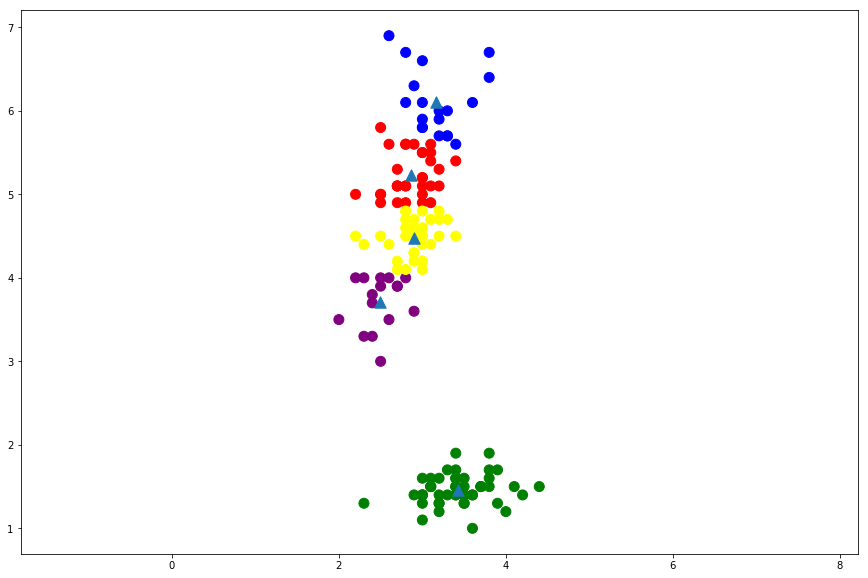

In [21]:
# the following command results in creating of 5 clusters of `dnew` data
kmeans = KMeans(n_clusters=5, random_state=0).fit(dnew)
# cl are the assignments of points to one of the 5 clusters
cl=kmeans.labels_
# cen are the centers of the 5 clusters, obtained by finding the average of all examples assigned to the clusters
cen=kmeans.cluster_centers_
# plot the results
colors=['red','green','blue','purple','yellow']
plt.figure(figsize=(15,10))
plt.scatter(dnew[:,0],dnew[:,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
plt.scatter(cen[:,0],cen[:,1],s=130, marker="^")
plt.axis('equal')

# cross-tabulation with the flower types
print(crosstab(cl, y, rownames=['cl'], colnames=['y']))

**Question 7**. Discuss on the quality of outcome of k-means clustering

**Question 8**. Repeat k-means clustering, but this time change the nnumber of clusters to 3. Discuss the results. Compare the results with the results of hierarchical clustering from **Question 4**.

**Question 9**. Repeat k-means clustering on the whole Iris data set, the same as you did in **Question 6**. Discuss your results and compare them to the hierarchical clustering results.

**Answer 7**: <br>
k-means clustering provides a decent job of clustering the data points into groups with a centroid representing the center point where all points grouped into this cluster have the smallest average distance from that centroid. At n=5 clusters, the crosstab shows the following counts of data points in each cluster: 32, 50, 19, 16, and 33. My expected count of data points in each cluster based on the average is 30. The first and last cluster each are close to the expected value but the middle rows (clusters) in the crosstab deviate from the expected mean greatly. However, the scatter plot shows this type of clustering still provides a decent job of making sure the data points are grouped properly where there's no offset/outlier and I can draw straight lines separating each cluster. Also comparing these results with the answer to Question 4, I can only conclude that 5 clusters is too many leading to lowered quality of outcomes. Looking ahead at Question 8, I can tell that 3 clusters is more optimal. Therefore the quality of k-means clustering is good, it is simply a poor choice for the number of clusters.

y    0   1   2
cl            
0   50   0   0
1    0   2  41
2    0  48   9


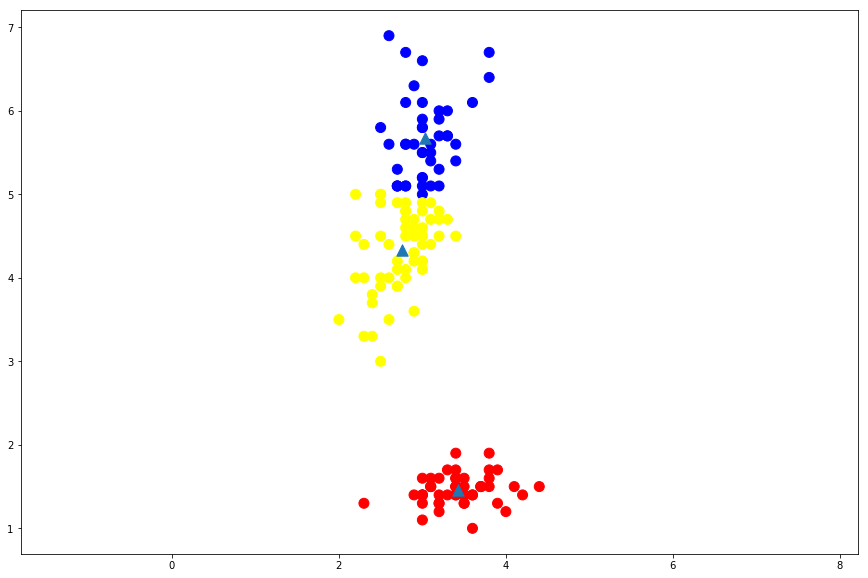

In [22]:
## Answer 8
# the following command results in creating of 3 clusters of `dnew` data
kmeans = KMeans(n_clusters=3, random_state=0).fit(dnew)
cl=kmeans.labels_
cen=kmeans.cluster_centers_
# plot the results
colors=['red','green','blue','purple','yellow']
plt.figure(figsize=(15,10))
plt.scatter(dnew[:,0],dnew[:,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
plt.scatter(cen[:,0],cen[:,1],s=130, marker="^")
plt.axis('equal')
print(crosstab(cl, y, rownames=['cl'], colnames=['y']))

#   Comparing the 3 clusters created by the hierarchical clustering with the one produced by k-means algorithm, I
# prefer the results of k-means. This is due to k-means algorithm producing clusters that match my expected values
# much more closely. In the k-means algorithm the first, second, and third clusters contain 50, 43, and 57 data
# values (flowers) respectively. The expected number of data values in each cluster is 50 as there are 3 total
# clusters. Meanwhile, hierarchical clustering produced the clusters with the following counts of data values: 50,
# 31, 69. Clearly, k-means algorithm produced better clusters because the second and third clusters contains better
# counts of data values that are closer to the expected number of data values grouped into each cluster. Furthermore,
# using the formula I created to measure number of successes, k-means algorithm performs better.
# k-means success rate: 0.91
# hierarchical success rate: 0.75
# k-means success rate at 3 clusters is > than hierarchical success rate

y    0   1   2
cl            
0    0  27   1
1   50   0   0
2    0   0  32
3    0  23  17


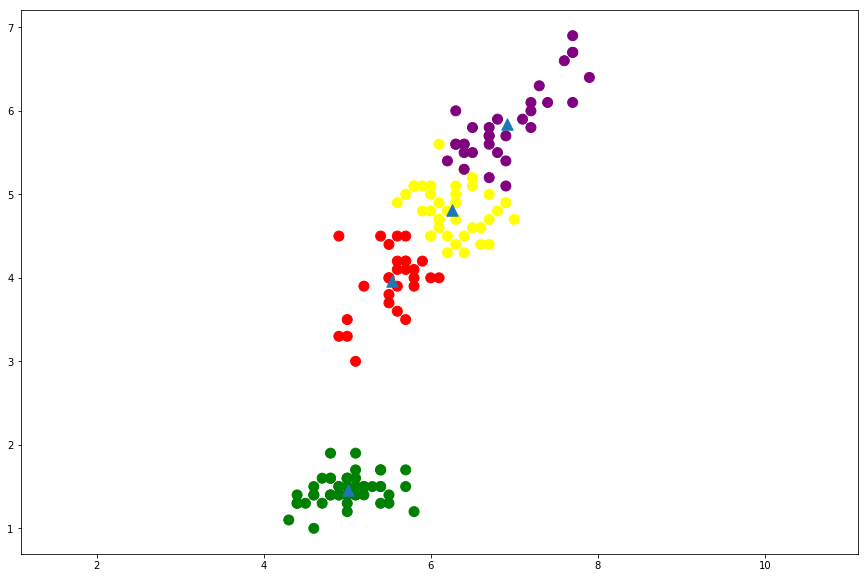

In [23]:
## Answer 9
# running kmeans algorithm clustering on the original Iris data `d`
kmeans = KMeans(n_clusters=4, random_state=0).fit(d)
cl=kmeans.labels_
cen=kmeans.cluster_centers_
# plot the results
colors=['red','green','blue','purple','yellow']
plt.figure(figsize=(15,10))
# I compared the first and third attributes just like I did for Question 6
plt.scatter(d[:,0],d[:,2],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
plt.scatter(cen[:,0],cen[:,2],s=130, marker="^")
plt.axis('equal')

print(crosstab(cl, y, rownames=['cl'], colnames=['y']))

#   Using k-means algorithm produced better clusters compared to hierarchical clustering. The clusters are more evenly
# spread as evident already in the scatter plot where the red dots are now incorporating more than just 4 dots. Yes,
# one of the yellow dots does overreach and is seemingly closer to the purple centroid, but this algorithm still
# does a better job than hierarchical. Once again bringing the formula I proposed,
# k-means success rate: 0.80
# hierarchical success rate: 0.53
# k-means clustering does better than hierarhical clustering by a whopping 0.27 rating.

## Lab 6.b Document Clustering (50% of grade)

In this part of the lab assignment, you will apply your clustering knowledge on the Newsgroup data from **Lab 5**. The following is a list of questions.

1. Select $N = 100$ random documents and their types from the newsgroup data. Use Google search to figure out how to do it in Python. The reason we are doing this is that hierrchical clustering can be very slow on large data sets.

2. Find 3 clusters using deafult (single-link, Eucliedan distance) hierarchical clustering. Use cross-tabulation to measure the quality of clustering.

3. Repeat step 2, by trying to find a better choice of parameters for hierarchical clustering. Try the Jaccard or cosine distance instead of Eucliedean. Report on your findings

4. Repeat step 3, but this time use k-means clustering. Compare with the results from step 3.

5. Instead of $N = 100$, select $N= 200, 500, 1000, 2000, 5000$ random documents. Set number of clusters to 5. Apply hierarchical and k-means clustering on such data and measure time. Discuss how does the time scale with $N$. For k-means clustering, discuss how do the clusters centers change as the data size increases -- do you see some qualitative improvements in the quality of clustering?

In [344]:
documents = np.loadtxt('documents.csv', delimiter=",",dtype='int')
documents = np.transpose(documents)
newsgroup = np.loadtxt('newsgroup.csv', delimiter=",",dtype='int')

import time

In [353]:
# Task 1: Creating a list of 100 random integers and making sure there are no repeats. Then grab the documents from
# newsgroup and their group types.
l_rand = []
while len(l_rand) != 100:
    random_int = np.random.randint(16242)
    if random_int not in l_rand: l_rand.append(random_int)
print('Double checking length:', len(l_rand))

docs = []
groups = []
for i in l_rand:
    docs.append(documents[i])
    groups.append(newsgroup[i])
docs = np.array(docs)
groups = np.array(groups)

# Task 2: Find 3 clusters using default single-link,euclidean hierarchical clustering; Find cross-tabulation
link = hierarchy.linkage(docs, method='single', metric='euclidean')
clusters = hierarchy.fcluster(link, 3, criterion='maxclust')
print(crosstab(clusters, groups, rownames=['clusters'], colnames=['newsgroup']))
print()

start = time.time()
# Task 3: Find better choice of parameters for task 2
link = hierarchy.linkage(docs, method='complete', metric='correlation')
clusters = hierarchy.fcluster(link, 3, criterion='maxclust')
print(crosstab(clusters, groups, rownames=['clusters'], colnames=['newsgroup']))
print()

# Task 4: Repeat steps 2 and 3 with k-means
kmeans = KMeans(n_clusters=3, random_state=0).fit(docs)
cl=kmeans.labels_
cen=kmeans.cluster_centers_
print(crosstab(cl, groups, rownames=['cl'], colnames=['newsgroup']))
end = time.time()

time_diff = end-start
print(time_diff)

Double checking length: 100
newsgroup   1   2   3   4
clusters                 
1          24  21  18  35
2           0   0   0   1
3           1   0   0   0

newsgroup   1   2   3   4
clusters                 
1           8  17  10  18
2           2   0   0  10
3          15   4   8   8

newsgroup   1   2   3   4
cl                       
0           7   0   1   0
1          16  17  15  28
2           2   4   2   8
0.09888386726379395


In [354]:
# Task 5: Select different N-numbers of random documents and repeat with cluster=5. Measure time.
# AT 200-numbers

l_rand = []
while len(l_rand) != 200:
    random_int = np.random.randint(16242)
    if random_int not in l_rand: l_rand.append(random_int)
print('Double checking length:', len(l_rand))

docs = []
groups = []
for i in l_rand:
    docs.append(documents[i])
    groups.append(newsgroup[i])
docs = np.array(docs)
groups = np.array(groups)

start = time.time()
link = hierarchy.linkage(docs, method='complete', metric='correlation')
clusters = hierarchy.fcluster(link, 5, criterion='maxclust')
print(crosstab(clusters, groups, rownames=['clusters'], colnames=['newsgroup']))
print()

kmeans = KMeans(n_clusters=5, random_state=0).fit(docs)
cl=kmeans.labels_
cen=kmeans.cluster_centers_
print(crosstab(cl, groups, rownames=['cl'], colnames=['newsgroup']))
end = time.time()
time_diff = end - start
print('time elapsed (in seconds):', time_diff)

Double checking length: 200
newsgroup   1   2   3   4
clusters                 
1          35  39  15  24
2           5  12   5  39
3           5   1   1   0
4           0   0   7   1
5           0   0   0  11

newsgroup   1   2   3   4
cl                       
0          41  48  18  47
1           4   4   1  11
2           0   0   7   0
3           0   0   1   0
4           0   0   1  17
time elapsed (in seconds): 0.09277701377868652


In [355]:
# AT 500-numbers

l_rand = []
while len(l_rand) != 500:
    random_int = np.random.randint(16242)
    if random_int not in l_rand: l_rand.append(random_int)
print('Double checking length:', len(l_rand))

docs = []
groups = []
for i in l_rand:
    docs.append(documents[i])
    groups.append(newsgroup[i])
docs = np.array(docs)
groups = np.array(groups)

start = time.time()
link = hierarchy.linkage(docs, method='complete', metric='correlation')
clusters = hierarchy.fcluster(link, 5, criterion='maxclust')
print(crosstab(clusters, groups, rownames=['clusters'], colnames=['newsgroup']))
print()

kmeans = KMeans(n_clusters=5, random_state=0).fit(docs)
cl=kmeans.labels_
cen=kmeans.cluster_centers_
print(crosstab(cl, groups, rownames=['cl'], colnames=['newsgroup']))
end = time.time()
time_diff = end - start
print('time elapsed (in seconds):', time_diff)

Double checking length: 500
newsgroup   1   2   3   4
clusters                 
1          21   2  12   3
2          47  11  24   5
3          57  66  24  52
4           2   8  13  53
5           1  18   8  73

newsgroup   1   2   3    4
cl                        
0          78  82  62  100
1           0   3   1   41
2           0   1   2   23
3          13  17   9   22
4          37   2   7    0
time elapsed (in seconds): 0.13195300102233887


In [356]:
# AT 1000-numbers

l_rand = []
while len(l_rand) != 1000:
    random_int = np.random.randint(16242)
    if random_int not in l_rand: l_rand.append(random_int)
print('Double checking length:', len(l_rand))

docs = []
groups = []
for i in l_rand:
    docs.append(documents[i])
    groups.append(newsgroup[i])
docs = np.array(docs)
groups = np.array(groups)

start = time.time()
link = hierarchy.linkage(docs, method='complete', metric='correlation')
clusters = hierarchy.fcluster(link, 5, criterion='maxclust')
print(crosstab(clusters, groups, rownames=['clusters'], colnames=['newsgroup']))
print()

kmeans = KMeans(n_clusters=5, random_state=0).fit(docs)
cl=kmeans.labels_
cen=kmeans.cluster_centers_
print(crosstab(cl, groups, rownames=['cl'], colnames=['newsgroup']))
end = time.time()
time_diff = end - start
print('time elapsed (in seconds):', time_diff)

Double checking length: 1000
newsgroup    1    2   3    4
clusters                    
1            5    0  13    0
2           88   44  55   44
3          113  134  67  156
4            2    7   6   92
5           62   29  35   48

newsgroup    1    2    3    4
cl                           
0           48   21   29   15
1            1   36    7   11
2            0    5    7  117
3           64   17   24   21
4          157  135  109  176
time elapsed (in seconds): 0.22392582893371582


In [357]:
# AT 2000-numbers

l_rand = []
while len(l_rand) != 2000:
    random_int = np.random.randint(16242)
    if random_int not in l_rand: l_rand.append(random_int)
print('Double checking length:', len(l_rand))

docs = []
groups = []
for i in l_rand:
    docs.append(documents[i])
    groups.append(newsgroup[i])
docs = np.array(docs)
groups = np.array(groups)

start = time.time()
link = hierarchy.linkage(docs, method='complete', metric='correlation')
clusters = hierarchy.fcluster(link, 5, criterion='maxclust')
print(crosstab(clusters, groups, rownames=['clusters'], colnames=['newsgroup']))
print()

kmeans = KMeans(n_clusters=5, random_state=0).fit(docs)
cl=kmeans.labels_
cen=kmeans.cluster_centers_
print(crosstab(cl, groups, rownames=['cl'], colnames=['newsgroup']))
end = time.time()
time_diff = end - start
print('time elapsed (in seconds):', time_diff)

Double checking length: 2000
newsgroup    1    2    3    4
clusters                     
1            9    2   45    5
2          104    3   18    6
3           14   34   49  365
4            3  127    4    1
5          468  246  217  280

newsgroup    1    2    3    4
cl                           
0           39   41   47   90
1          122   25   33   20
2          237  328  214  379
3            1   11    7  161
4          199    7   32    7
time elapsed (in seconds): 0.5079200267791748


In [358]:
# AT 5000-numbers

l_rand = []
while len(l_rand) != 5000:
    random_int = np.random.randint(16242)
    if random_int not in l_rand: l_rand.append(random_int)
print('Double checking length:', len(l_rand))

docs = []
groups = []
for i in l_rand:
    docs.append(documents[i])
    groups.append(newsgroup[i])
docs = np.array(docs)
groups = np.array(groups)

start = time.time()
link = hierarchy.linkage(docs, method='complete', metric='correlation')
clusters = hierarchy.fcluster(link, 5, criterion='maxclust')
print(crosstab(clusters, groups, rownames=['clusters'], colnames=['newsgroup']))
print()

kmeans = KMeans(n_clusters=5, random_state=0).fit(docs)
cl=kmeans.labels_
cen=kmeans.cluster_centers_
print(crosstab(cl, groups, rownames=['cl'], colnames=['newsgroup']))
end = time.time()
time_diff = end - start
print('time elapsed (in seconds):', time_diff)

Double checking length: 5000
newsgroup     1    2    3     4
clusters                       
1            59    0    4     0
2            20   24  153    34
3           264  304  269  1158
4            13  410    3     8
5          1100  370  380   427

newsgroup    1    2    3    4
cl                           
0          232   92  111  116
1          375    7   30    2
2          172   78   97   90
3            2   22   23  479
4          675  909  548  940
time elapsed (in seconds): 2.2675278186798096


### Insights
**Task 1:** I wasn't sure if you wanted us to select 100 random documents and then keep reusing it so I kept the rand within the same code as my clustering. However, this ended up being helpful as I found that there were some random groups of 100 data points where any type of clustering simply didn't work well even if it was jaccard or cosine.<br>
**Task 2:** (Single,euclidean) sometimes wouldn't even produce 3 clusters. I think this might be due to the distance being either very close or very far apart. <br>
**Task 3:** I found that complete provided the worst clustering when matched with jaccard and cosine. However surprisingly after much experimenting I found that correlation is a pretty good metric in improving the clustering. Then I narrowed it down to average and complete methods which both perform better at this metric. However the clear winner is (complete,correlation) after I kept running the cell to produce different collections of 100 data random documents from the data set. I've also taken a screenshot of one scenario where the success rate of the clustering with that combo was at 88%.<br>
**Task 4:** I tried my best to fiddle with the parameters but nothing really improved k-means from the base case we were given. I tried changing the init method and random state but the algorithm did not improve and generally worsened. However, comparing the cases between k-means and hierarchical, I surprisingly found hierarchical did better in general. One of the runs which I've taken a screenshot of and will provide with my lab submission shows that the success rate of hierarchical is much better than k-means.<br>
**Task 5:** I recorded these times from my first run (in seconds):<br>
- 100:      0.054872989654541016
- 200:     0.0793306827545166
- 500:     0.15511608123779297
- 1000:   0.18580293655395508
- 2000:   0.4704771041870117
- 5000:   2.5364480018615723
<br>
The scaling is quite weird. I'm not able to tell any exact big-O notation just from this information because there are decimal numbers. Even if I scaled everything by multiplying by 100, I can only pinpoint the big-O notation to being at least N but certainly less than N-squared. This is because the runtimes do not scale by 100 while comparing the N-numbers of document that differ by a mulitple of 10 (i.e. comparing 100 and 1000). At each N-number of documents there is a positive change as exhibited by these runtime ratios:
- 200/100: 1.445714608479539748049078173954991847739056053774671317455
- 500/200: 1.955310049678875562553007154525883465762412018804130232647
- 1000/500: 1.197831553448795275750276520055794653390373004976722134559
- 2000/1000: 2.532129539569416052378531656525418446169921139558664678700
- 5000/2000: 5.391225161200087045088590924394922224789783018589318078829
<br>
However there is no defined pattern. My thought is this could be due to the fact at every N-number of documents, all of my data points are different. I did not bring over the data points from the previous set leading to no correlation between the two. I'll try to do this better next time.
I did see a difference in the quality of clustering as well. The clusters are spread a little more evenly with high N-number of documents. I interpret this as normal since k-means improves with more runs through the data set and with more data sets that might close in distance, the algorithm will continue to do better by re-clustering the many close together data points further and further even if the distance is minimal. 

In [213]:
# Task 3 experimenting (Please ignore)
link = hierarchy.linkage(docs, method='average', metric='correlation')
clusters = hierarchy.fcluster(link, 3, criterion='maxclust')
print(crosstab(clusters, groups, rownames=['articles'], colnames=['distance']))
# success rate: 56%
link = hierarchy.linkage(docs, method='complete', metric='correlation')
clusters = hierarchy.fcluster(link, 3, criterion='maxclust')
print(crosstab(clusters, groups, rownames=['articles'], colnames=['distance']))
# success rate: 88%

distance   1  2  3   4
articles              
1         36  9  6   5
2          0  1  3  26
3          1  8  5   0
distance   1   2  3   4
articles               
1          4   3  4  19
2          1  15  5   9
3         32   0  5   3


In [315]:
# Task 4 experimenting (Please ignore)
link = hierarchy.linkage(docs, method='complete', metric='correlation')
clusters = hierarchy.fcluster(link, 3, criterion='maxclust')
print(crosstab(clusters, groups, rownames=['clusters'], colnames=['newsgroup']))
print()
# success rate: 68%
kmeans = KMeans(n_clusters=3, random_state=0).fit(docs)
cl=kmeans.labels_
cen=kmeans.cluster_centers_
print(crosstab(cl, groups, rownames=['cl'], colnames=['newsgroup']))
# success rate: 30%

newsgroup  1   2  3   4
clusters               
1          9   2  1   6
2          8  18  5  19
3          7   1  7  17

newsgroup   1   2   3   4
cl                       
0          17  16  10  26
1           3   0   3   7
2           4   5   0   9
